In [22]:
#importing libraries required for Exploratory Data Analysis
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import gdown
import os
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [23]:
# Suppress unnecessary warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
# Function to download a file from Google Drive
def download_data(url, output):
    gdown.download(url, output, quiet=False)

# List of Google Drive URLs and their corresponding output file names
datasets = [
    {"url": "https://drive.google.com/file/d/1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE/view?usp=sharing", "output": "customer.csv"},
    {"url": "https://drive.google.com/file/d/10fDruSlOY9p7-4HCllSFc8M4Ufb1U8iG/view?usp=sharing", "output": "product.csv"},
    {"url": "https://drive.google.com/file/d/1YCzfuGVN76F-CntRH_NL1l-YPdFMDQEG/view?usp=sharing", "output": "transaction.csv"},
]

# Loop through each dataset and download it if it doesn't already exist
for dataset in datasets:
    file_url = dataset["url"]
    file_output = dataset["output"]

    # Convert to a direct download link
    file_id = file_url.split('/d/')[1].split('/view')[0]
    download_url = f"https://drive.google.com/uc?id={file_id}"

    # Check if the file already exists
    if not os.path.isfile(file_output):
        print(f"Downloading {file_output}...")
        download_data(download_url, file_output)
    else:
        print(f"{file_output} already exists. Skipping download.")

print("All datasets processed.")


customer.csv already exists. Skipping download.
product.csv already exists. Skipping download.
transaction.csv already exists. Skipping download.
All datasets processed.


In [24]:
#reading datasets
customer_data=pd.read_csv('customer.csv')
print(customer_data.head())
product_data=pd.read_csv('product.csv')
print(product_data.head())
transaction_data=pd.read_csv('transaction.csv')
print(transaction_data.head())
datasets=[customer_data,product_data,transaction_data]
# datasets are loaded perfectly

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [25]:
# Loop through datasets and compute correlations
for dataset_name, dataset in zip(["customer_data", "product_data", "transaction_data"], datasets):
    print(f"\nCorrelations in {dataset_name}:")
    
    # Only compute correlations for numerical columns
    numeric_data = dataset.select_dtypes(include=[np.number])
    
    # Check if there are numerical columns to calculate correlation
    if not numeric_data.empty:
        correlation_matrix = numeric_data.corr()
        print(correlation_matrix)
    else:
        print("No numerical columns available to compute correlations.")



Correlations in customer_data:
No numerical columns available to compute correlations.

Correlations in product_data:
       Price
Price    1.0

Correlations in transaction_data:
            Quantity  TotalValue     Price
Quantity    1.000000    0.609972 -0.009378
TotalValue  0.609972    1.000000  0.722714
Price      -0.009378    0.722714  1.000000


In [26]:
# exploring the datasets 
for data in datasets:
    print(data.info())
    print("\n" + "-"*50 + "\n")
for data in datasets:
    print(data.describe())
    print("\n" + "-"*50 + "\n")
# there are 3 numeric columns in customer_data with 200 unique entries
#there is 1 numeric column in product_data with 100 entries
#there are 3 numeric columns with 1000 entries in transction dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

--------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

--------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data col

In [27]:
# since there is high correlation in transaction dataset we will scale the columns
# Select the numerical columns for scaling
numerical_columns = ['Quantity', 'TotalValue', 'Price']

# Initialize the scaler
scaler = StandardScaler()

# Scale the data (standardization)
transaction_data_scaled = transaction_data[numerical_columns].copy()
transaction_data_scaled[numerical_columns] = scaler.fit_transform(transaction_data[numerical_columns])

#** Now `transaction_data_scaled` contains the scaled features**
print(transaction_data_scaled.head())
# Drop the 'Price' column if it's highly correlated with 'TotalValue'
transaction_data_dropped = transaction_data.drop(columns=['Price'])

# Now `transaction_data_dropped` contains 'Quantity' and 'TotalValue' (you can add other features as needed)
print(transaction_data_dropped.head())


# Apply PCA to reduce the dimensionality of the data
pca = PCA(n_components=2)  # Reduce to 2 components (or more depending on the data)
transaction_data_scaled_for_pca = transaction_data_scaled[['TotalValue', 'Price']].copy()
transaction_data_pca = pca.fit_transform(transaction_data_scaled_for_pca)

# Create a new DataFrame with the principal components
transaction_data_pca_df = pd.DataFrame(data=transaction_data_pca, columns=['PC1', 'PC2'])

# Now `transaction_data_pca_df` contains the uncorrelated principal components
print(transaction_data_pca_df.head())

   Quantity  TotalValue     Price
0 -1.375488   -0.789850  0.199948
1 -1.375488   -0.789850  0.199948
2 -1.375488   -0.789850  0.199948
3 -0.480571   -0.179825  0.199948
4  0.414347    0.430200  0.199948
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  
0      300.68  
1      300.68  
2      300.68  
3      601.36  
4      902.04  
        PC1       PC2
0 -0.417124  0.699893
1 -0.417124  0.699893
2 -0.417124  0.699893
3  0.014229  0.268541
4  0.445582 -0.162812


In [28]:
# finding if there are any null values if there are then we will be dropping them
# creating function and loop for checking and removing null values
def remove_nullvalues(data):
    # Check if there are any null values in the data
    if data.isnull().any().any():  # This checks if any column has any null values
        print("Null values found, removing them...")
        # Drop rows with null values and modify the DataFrame in place
        data.dropna(inplace=True)
    else:
        print("No null values found.")

# Example dataset list
datasets = [customer_data, product_data, transaction_data]

# Loop through each dataset and apply the function
for i in datasets:
    remove_nullvalues(i)
# data cleaning process done.

No null values found.
No null values found.
No null values found.


In [29]:
# 1. Method 1: Z-score method
def detect_outliers_zscore(data, threshold=3):
    # Only numeric columns
    numeric_data = data.select_dtypes(include=[np.number])
    if numeric_data.empty:
        return pd.DataFrame()  # No numeric columns to check
    z_scores = np.abs(zscore(numeric_data))  # Z-scores for numeric columns
    outliers = (z_scores > threshold)
    return data[outliers.any(axis=1)]  # Return rows with any outliers

# 2. Method 2: IQR method
def detect_outliers_iqr(data):
    # Only numeric columns
    numeric_data = data.select_dtypes(include=[np.number])
    if numeric_data.empty:
        return pd.DataFrame()  # No numeric columns to check
    Q1 = numeric_data.quantile(0.25)
    Q3 = numeric_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter out outliers
    outliers = ((numeric_data < lower_bound) | (numeric_data > upper_bound))
    return data[outliers.any(axis=1)]  # Return rows with any outliers

# datasets are customer_data, product_data, transaction_data
datasets = [customer_data, product_data, transaction_data]

# Looping through datasets and detecting outliers using both methods
for dataset_name, dataset in zip(["customer_data", "product_data", "transaction_data"], datasets):
    print(f"\nOutliers in {dataset_name} (Z-score method):")
    outliers_zscore_result = detect_outliers_zscore(dataset)
    print(outliers_zscore_result)

    print(f"\nOutliers in {dataset_name} (IQR method):")
    outliers_iqr_result = detect_outliers_iqr(dataset)
    print(outliers_iqr_result)



Outliers in customer_data (Z-score method):
Empty DataFrame
Columns: []
Index: []

Outliers in customer_data (IQR method):
Empty DataFrame
Columns: []
Index: []

Outliers in product_data (Z-score method):
Empty DataFrame
Columns: [ProductID, ProductName, Category, Price]
Index: []

Outliers in product_data (IQR method):
Empty DataFrame
Columns: [ProductID, ProductName, Category, Price]
Index: []

Outliers in transaction_data (Z-score method):
Empty DataFrame
Columns: [TransactionID, CustomerID, ProductID, TransactionDate, Quantity, TotalValue, Price]
Index: []

Outliers in transaction_data (IQR method):
Empty DataFrame
Columns: [TransactionID, CustomerID, ProductID, TransactionDate, Quantity, TotalValue, Price]
Index: []


In [30]:
# Step 1: Merge datasets
# Merging customer_data with transaction_data on CustomerID
merged_data = pd.merge(transaction_data, customer_data, on='CustomerID', how='left')

# Merging the result with product_data on ProductID
merged_data = pd.merge(merged_data, product_data, on='ProductID', how='left')

# Step 2: Handle missing values (if any)
# Dropping rows with missing values
merged_data = merged_data.dropna()

# Step 3: Feature engineering
# Extracting year, month, and day from TransactionDate
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
merged_data['TransactionYear'] = merged_data['TransactionDate'].dt.year
merged_data['TransactionMonth'] = merged_data['TransactionDate'].dt.month
merged_data['TransactionDay'] = merged_data['TransactionDate'].dt.day

# Creating a new feature: Average Price per Item
merged_data['AvgPricePerItem'] = merged_data['TotalValue'] / merged_data['Quantity']

# Creating a new feature: Customer Lifetime Value (CLV)
clv = merged_data.groupby('CustomerID')['TotalValue'].sum()
clv.name = 'CustomerLifetimeValue'
merged_data = pd.merge(merged_data, clv, on='CustomerID', how='left')

# Step 4: Scaling numerical features
numerical_features = ['Quantity', 'TotalValue', 'AvgPricePerItem', 'CustomerLifetimeValue']
scaler = StandardScaler()
merged_data[numerical_features] = scaler.fit_transform(merged_data[numerical_features])


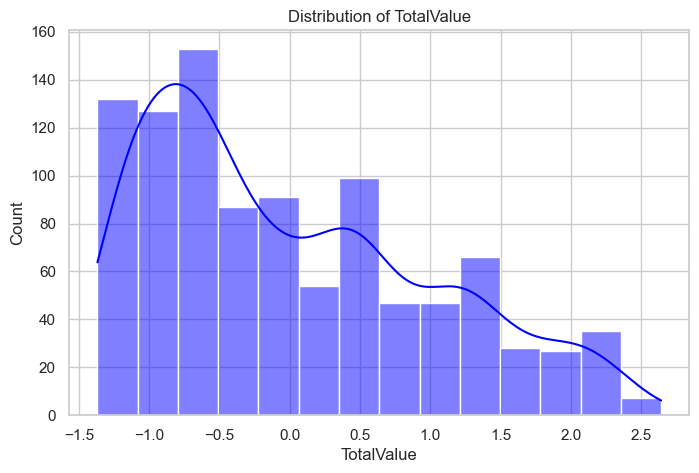

In [31]:
# Step 5: Visualization
sns.set(style="whitegrid")

# 1. Distribution of TotalValue
plt.figure(figsize=(8, 5))
sns.histplot(merged_data['TotalValue'], kde=True, color='blue')
plt.title('Distribution of TotalValue')
plt.show()


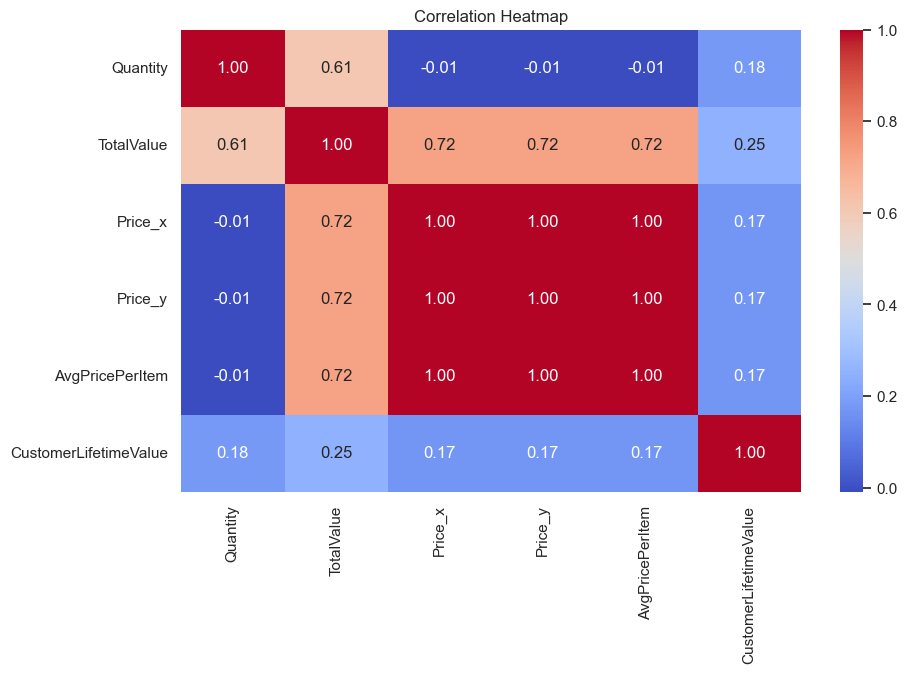

In [32]:
# 2. Correlation heatmap
# Ensure correlation matrix only considers numeric columns
numeric_data = merged_data.select_dtypes(include=['float64', 'int64'])

if numeric_data.empty:
    raise ValueError("No numerical data available to compute correlations.")

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



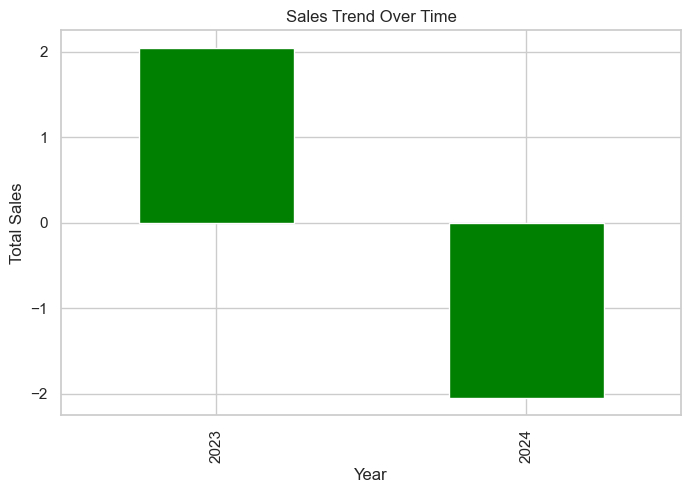

In [33]:
# 3. Sales trend over time
sales_trend = merged_data.groupby('TransactionYear')['TotalValue'].sum()
sales_trend.plot(kind='bar', figsize=(8, 5), color='green')
plt.title('Sales Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()


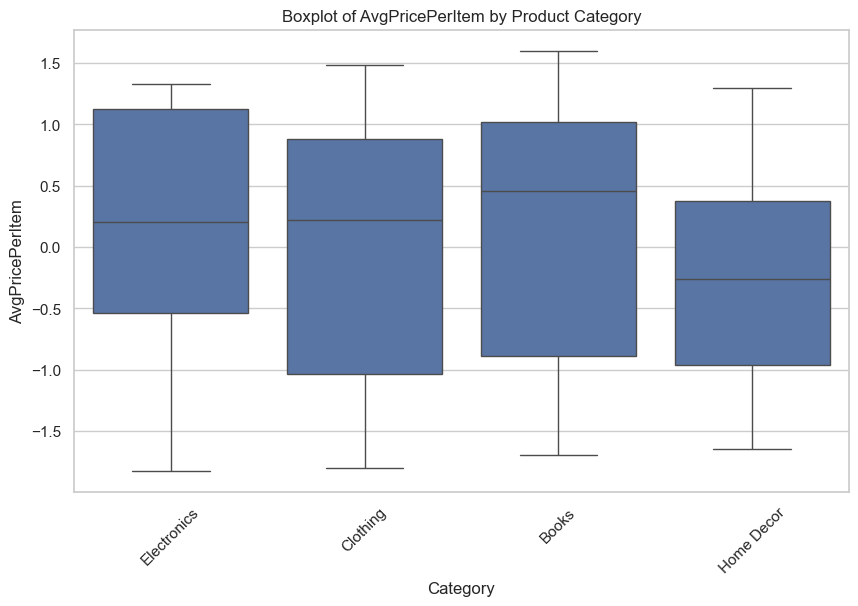

In [34]:
# 4. Boxplot of AvgPricePerItem by Category
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='Category', y='AvgPricePerItem')
plt.title('Boxplot of AvgPricePerItem by Product Category')
plt.xticks(rotation=45)
plt.show()


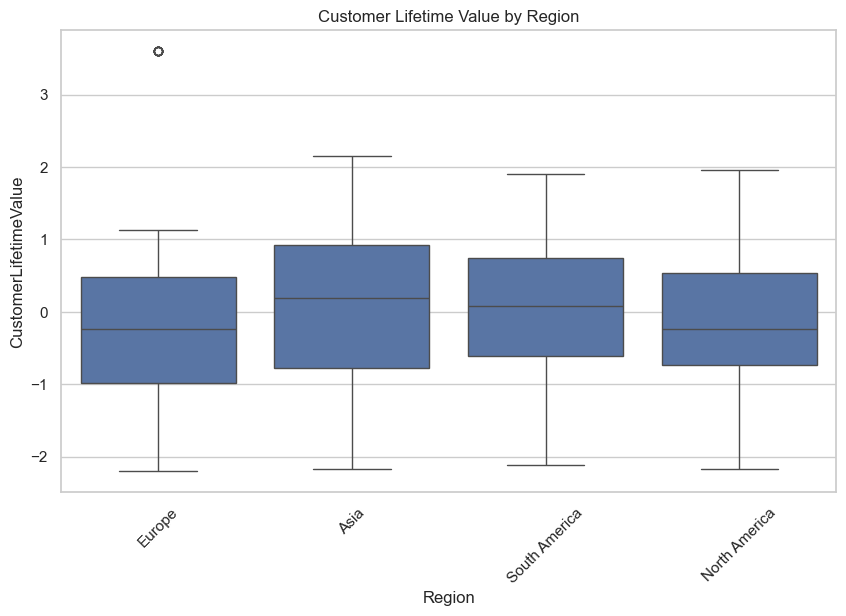

In [35]:
# 5. CLV distribution per region
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='Region', y='CustomerLifetimeValue')
plt.title('Customer Lifetime Value by Region')
plt.xticks(rotation=45)
plt.show()



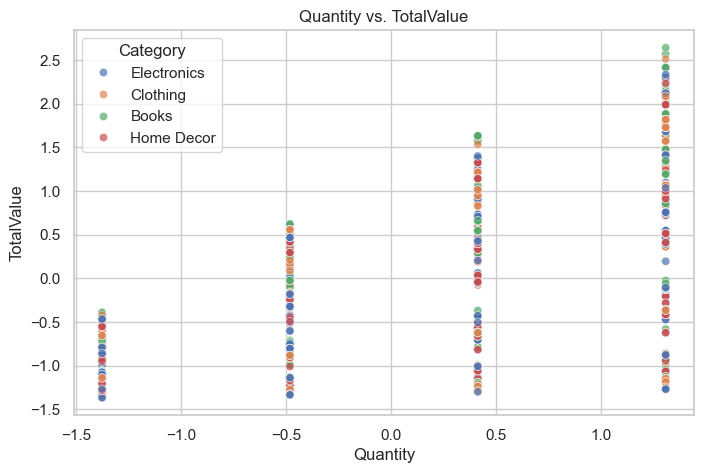

In [36]:
# 6. Quantity vs. TotalValue scatterplot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged_data, x='Quantity', y='TotalValue', hue='Category', alpha=0.7)
plt.title('Quantity vs. TotalValue')
plt.show()

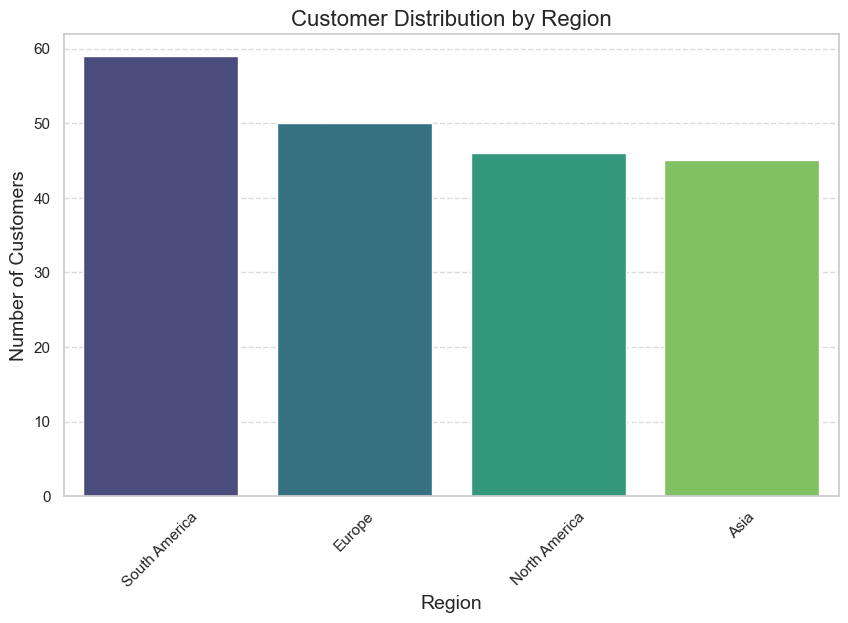

In [37]:
# 7. distribution of customers over a region

# Plot customer distribution by region
plt.figure(figsize=(10, 6))
sns.countplot(data=customer_data, x='Region', palette='viridis', order=customer_data['Region'].value_counts().index)
plt.title('Customer Distribution by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [38]:
# saving the merged_data for future use
# Save merged_data to a CSV file
merged_data.to_csv('merged_data.csv', index=False)
from IPython.display import HTML

# Save the merged_data to a CSV file
csv_filename = "merged_data.csv"
merged_data.to_csv(csv_filename, index=False)

# Generate a download link for the CSV file
def create_download_link(filename):
    """
    Creates a downloadable link for a given file.
        HTML: HTML link to download the file.
    """
    return HTML(f'<a href="{filename}" download>{filename} (Click to Download)</a>')

# Display the download link
create_download_link(csv_filename)
